In [45]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

In [46]:
def isInTheList(elemento,arreglo):
    for i in arreglo:
        if np.array_equal(i,elemento):
            return True            
    return False  

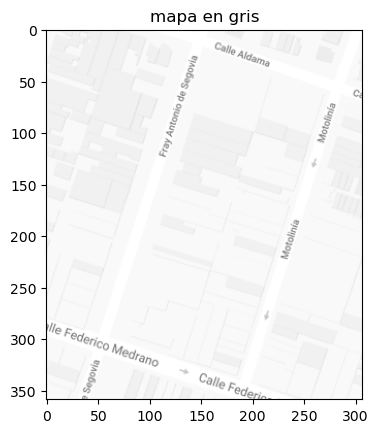

In [47]:
mapa=cv2.imread('map3chiquito.PNG')
gray = cv2.cvtColor(mapa,cv2.COLOR_BGR2GRAY)
plt_gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(plt_gray)
plt.title('mapa en gris')
plt.show()

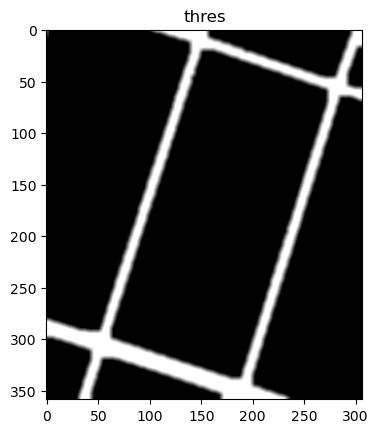

In [48]:

ret,th1 = cv2.threshold(gray,254,255,cv2.THRESH_BINARY)
kernel = np.ones((11,11), np.uint8) 
th1 = cv2.dilate(th1,kernel,1)
kernel = np.ones((11,11), np.uint8) 
th1 = cv2.erode(th1,kernel,1)
th1 = cv2.GaussianBlur(th1,(5,5),cv2.BORDER_DEFAULT) 
plt_th1 = cv2.cvtColor(th1, cv2.COLOR_BGR2RGB)
plt.imshow(plt_th1)
plt.title('thres')
plt.show()

(20, 3)
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[255 255 255]
---
[255 255 255]
---
[255 255 255]
---
[255 255 255]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[255 255 255]
(20, 3)
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[255 255 255]
---
[255 255 255]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
(20, 3)
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[255 255 255]
---
[255 255 255]
(20, 3)
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[0 0 0]
---
[255 255 255]
---
[255

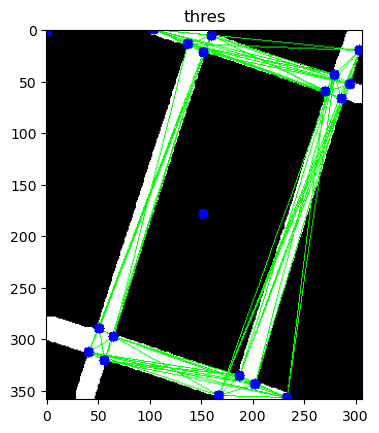

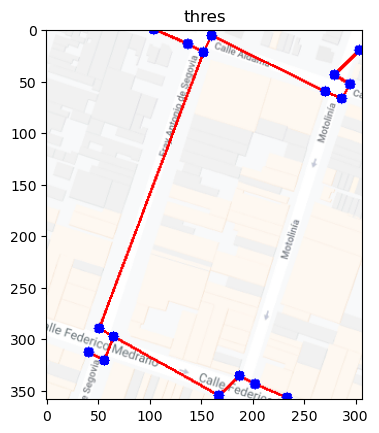

In [81]:
dst = cv2.cornerHarris(th1,2,3,0.05)
ret, dst = cv2.threshold(dst,0.04*dst.max(),255,0)
dst = np.uint8(dst)
ret,th2 = cv2.threshold(th1,235,255,cv2.THRESH_BINARY)
th2 = cv2.dilate(th2,kernel,1)
th2 = cv2.cvtColor(th2,cv2.COLOR_GRAY2BGR)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst,30, cv2.CV_32S)
vertices=np.int0(centroids)
    
aux1=vertices
aux2=vertices
verticesConectados=[]
aristas=[]

for h in range(len(aux1)):
    i=aux1[h]
    for k in range(h,len(aux2)):
        j=aux2[k]
        if not (i==j).all():
            x = np.linspace(i[0], j[0], 20).astype(int)
            y = np.linspace(i[1], j[1], 20).astype(int)
            m = th2[y,x,:]
            if np.mean(m)>250:
                print("Forma 2:",i,j)
                distancia = int(sqrt((i[0] - j[0])**2 + (i[1] - j[1])**2))
                aristas.append((i,j,distancia))
                if not isInTheList(i,verticesConectados):
                    verticesConectados.append(i)
                if not isInTheList(j,verticesConectados):
                    verticesConectados.append(j)
            #x = int((i[0] + j[0])/2)
            #y = int((i[1] + j[1])/2)
                
            #x1 = int((i[0] + x)/2)
            #y1 = int((i[1] + y)/2)
            #x2 = int((i[0] + x1)/2)
            #y2 = int((i[1] + y1)/2)
                
            #x3 = int((j[0] + x2)/2)
            #y3 = int((j[1] + y2)/2)
            #x4 = int((j[0] + x3)/2)
            #y4 = int((j[1] + y3)/2)
            #Pixeles
            #m = th2[y][x]
            #m1 = th2[y1][x1]
            #m2 = th2[y2][x2]
            #m3 = th2[y3][x3]
            #m4 = th2[y4][x4]
            #Condición si son blancos
            if((m[0]>250 and m[1]>250 and m[2]>250) and (m1[0]>250 and m1[1]>250 and m1[2]>250) and (m2[0]>250 and m2[1]>250 and m3[2]>250) and (m3[0]>250 and m3[1]>250 and m3[2]>250) and (m4[0]>250 and m4[1]>250 and m4[2]>250)):
                print("Forma 2:",i,j)
                distancia = int(sqrt((i[0] - j[0])**2 + (i[1] - j[1])**2))
                aristas.append((i,j,distancia))
                if not isInTheList(i,verticesConectados):
                    verticesConectados.append(i)
                if not isInTheList(j,verticesConectados):
                    verticesConectados.append(j)
                #aqui deberian sacar los puntos de intermedios y verificar si i y j estan conectados
                    #si estan conectados calcular el costo (la distancia en pixeles entre ellos usan teorema de pitagoras papá) y agregarlos al grafo
                    
for arista in aristas:
    cv2.line(th2, tuple(arista[0]), tuple(arista[1]), (0,255,0), 1)
    
for point in vertices:
    cv2.circle(th2,(point[0], point[1]), 5, (255,0,0), -1)    
    cv2.waitKey(1)
        
plt_th2 = cv2.cvtColor(th2, cv2.COLOR_BGR2RGB)
plt.imshow(plt_th2)
plt.title('thres')
plt.show()
#cv2.imwrite('Puntos.png',th2)
#algoritmo de prim
grafo = {}
for i in verticesConectados:
    grafo[tuple(i)] = {}
for arista in aristas:
    grafo[tuple(arista[0])][tuple(arista[1])] = arista[2]
    grafo[tuple(arista[1])][tuple(arista[0])] = arista[2]

def prim(grafo):
    visitados = []
    arbol = []
    visitados.append(list(grafo.keys())[0])
    while len(visitados) < len(grafo):
        menor = 1000000
        for i in visitados:
            for j in grafo[i]:
                if j not in visitados and grafo[i][j] < menor:
                    menor = grafo[i][j]
                    nodo1 = i
                    nodo2 = j
        visitados.append(nodo2)
        arbol.append((nodo1, nodo2))
    return arbol
arbol = prim(grafo)
for arista in arbol:
    cv2.line(mapa, tuple(arista[0]), tuple(arista[1]), (0,0,255), 2)

for point in verticesConectados:
    cv2.circle(mapa,(point[0], point[1]), 5, (255,0,0), -1)    
    cv2.waitKey(1)

plt_mapa = cv2.cvtColor(mapa, cv2.COLOR_BGR2RGB)
plt.imshow(plt_mapa)
plt.title('thres')
plt.show()